In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
import random
import matplotlib.pyplot as plt

In [14]:
def complex_cal(qc, statevector_sim):
    statevector_job = execute(qc, statevector_sim)
    statevector_result = statevector_job.result()
    psi = statevector_result.get_statevector()
    z0 = psi[0]
    z1 = psi[1]
    #print(z1)
    if z1.real > 0 or z1.imag > 0:
        z = z0/z1
        z = round(z.real, 2) + round(z.imag, 2) * 1j
    else:
        z = 0
    return z

init_q = QuantumRegister(1, 'q')
qc = QuantumCircuit(init_q)

statevector_sim = Aer.get_backend("statevector_simulator")
tab = [[], []]
x = []
y = []
tab_temp = []
z0 = 0+0j
z1 = 0+0j
z = 0+0j

shots = 100
max_shots = 10
for w in range(max_shots):
    # First part
#    for i in range(shots):
#        qc.u(pi/2, 0, pi/2, init_q)
#        #qc.h(init_q)
#        z = complex_cal(qc, statevector_sim)
#        if z != 0:
#            tab_temp.append(z)

    qc.barrier()
    # Second part
    for i in range(shots):
        if random.randint(0, 1) == 1:
            #qc.u(7*pi/2, 0, 0, init_q)
            qc.h(init_q)
        else:
            qc.u(0, 5*pi/3, 0, init_q)
        z = complex_cal(qc, statevector_sim)
        if z != 0:
            tab_temp.append(z)
    qc.barrier()

    if (w + 1) % 5 == 0:
        print("Full circuit bloch :", w+1, "/", max_shots)

print("Fini!")


for i in tab_temp:
    iteration = tab_temp.count(i)
    if tab[0].count(i) < 1:
        tab[0].append(i)
        tab[1].append(iteration)

for i in range(len(tab[0])):
    x.append(tab[0][i].real)
    y.append(tab[0][i].imag)

print("Total of SV :", len(tab_temp))
gates = qc.count_ops()
num_gates = gates['u']+gates['h']
print("Number of gates :", num_gates)
    
#qc.draw()

Full circuit bloch : 5 / 10
Full circuit bloch : 10 / 10
Fini!
Total of SV : 717
Number of gates : 1000


U1(H)
U2(0, 5*pi/3, 0)
Number of gates : 1000
Number of value :  411


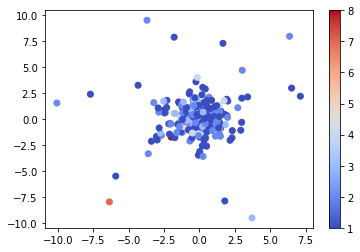

In [15]:
plt.scatter(x, y, c=tab[1], cmap="coolwarm")
plt.colorbar()
#print("U(pi/2, 0, pi/2)")
print("U1(H)")
print("U2(0, 5*pi/3, 0)")
print("Number of gates :", num_gates)
print("Number of different value : ", len(x))

U1(H)
U2(0, 5*pi/3, 0)
Number of gates : 1000
Number of different values in zoom :  396 / 411


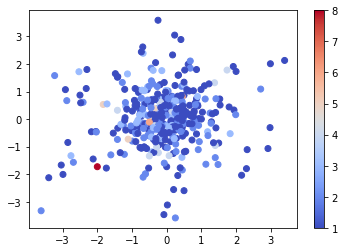

In [21]:
x_bis = x.copy()
y_bis = y.copy()
tab_bis = tab.copy()

gen_tab = [[], [], []]
zoom_in = 4

for i in range(len(x_bis)):
    if (x_bis[i] > -zoom_in and x_bis[i] < zoom_in) and (y_bis[i] > -zoom_in and y_bis[i] < zoom_in):
        gen_tab[0].append(x_bis[i])
        gen_tab[1].append(y_bis[i])
        gen_tab[2].append(tab_bis[1][i])
        
plt.scatter(gen_tab[0], gen_tab[1], c=gen_tab[2], cmap="coolwarm")
plt.colorbar()
#print("U(pi/2, 0, pi/2)")
print("U1(H)")
print("U2(0, 5*pi/3, 0)")
print("Number of gates :", num_gates)
print("Number of different values in zoom : ", len(gen_tab[0]), "/", len(x))